In [1]:
import numpy 
import pandas
import sklearn.ensemble
import joblib
import sklearn.svm
from sklearn.neighbors import KNeighborsClassifier
import sklearn.ensemble
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import numpy as np

In [2]:
# !pip uninstall scikit-learn --yes
# !pip install scikit-learn==1.2.2
# !pip install xgboost
# !pip install shap

In [3]:
dataframe =  pandas.read_csv("file:\\Users\mayma\Downloads\cleaned_data (1).csv")
dataframe = dataframe.iloc[:,1:]
# dataframe=dataframe.iloc[:,:6]

sum(dataframe["gender_concept_name"] == 0)
dataframe

,last.status,age.splits,gender_concept_name,is_icu,was_ventilated,length_of_stay,Acute.Hepatic.Injury,Acute.Kidney.Injury,BMI.over30,BMI.over35,...,Potassium.between3.5and5.2 (normal level),Chloride.between96and107 (normal level),Bicarbonate.between21and31 (normal Level),Blood_Urea_Nitrogen.between5and20 (normal level),Creatinine.between0.5and1.2 (normal level),eGFR.below30- (Kidney Malfunction),Troponin.above0.01 (heart attack blood test),SBP.above139,MAP.above90,2345-7_Glucose [Mass/volume] in Serum or Plasma
0,0,38,0,1,0,52,1,1,1,0,...,1,0,1,1,1,0,0,0,1,130
1,0,38,0,1,0,69,1,0,0,0,...,1,0,1,1,1,0,0,0,1,308
2,0,38,0,0,1,19,1,1,0,0,...,1,0,1,1,1,0,0,0,0,139
3,0,66,0,0,1,5,1,1,0,0,...,1,1,1,0,1,0,0,1,1,104
4,1,66,0,1,0,40,1,0,0,0,...,1,1,1,0,1,0,0,0,0,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,0,66,0,0,1,3,1,1,1,1,...,1,1,1,1,1,0,0,1,0,91
1171,0,66,0,0,1,23,1,1,0,0,...,0,0,1,0,0,0,1,0,0,132
1172,0,38,1,0,1,1,1,1,0,0,...,1,1,1,1,1,0,0,0,1,92
1173,0,38,1,0,1,9,1,1,0,0,...,1,1,1,1,1,0,1,0,0,99


In [4]:
Y=dataframe["last.status"]
sum(dataframe["last.status"]==0)
# dataframe["age.splits"].tolist()

994

In [5]:
Y

0       0
1       0
2       0
3       0
4       1
       ..
1170    0
1171    0
1172    0
1173    0
1174    0
Name: last.status, Length: 1175, dtype: int64

In [6]:
dataframe = dataframe.iloc[:,1:]
dataframe = dataframe.drop(["length_of_stay"], axis = 1)
dataframe = dataframe.drop(["is_icu"], axis = 1)
dataframe = dataframe.drop(["was_ventilated"], axis = 1)
dataframe

,age.splits,gender_concept_name,Acute.Hepatic.Injury,Acute.Kidney.Injury,BMI.over30,BMI.over35,temperature.over38,pulseOx.under90,Respiration.over24,HeartRate.over100,...,Potassium.between3.5and5.2 (normal level),Chloride.between96and107 (normal level),Bicarbonate.between21and31 (normal Level),Blood_Urea_Nitrogen.between5and20 (normal level),Creatinine.between0.5and1.2 (normal level),eGFR.below30- (Kidney Malfunction),Troponin.above0.01 (heart attack blood test),SBP.above139,MAP.above90,2345-7_Glucose [Mass/volume] in Serum or Plasma
0,38,0,1,1,1,0,0,0,0,0,...,1,0,1,1,1,0,0,0,1,130
1,38,0,1,0,0,0,1,1,1,1,...,1,0,1,1,1,0,0,0,1,308
2,38,0,1,1,0,0,1,1,0,0,...,1,0,1,1,1,0,0,0,0,139
3,66,0,1,1,0,0,0,0,0,1,...,1,1,1,0,1,0,0,1,1,104
4,66,0,1,0,0,0,1,1,0,1,...,1,1,1,0,1,0,0,0,0,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,66,0,1,1,1,1,0,0,0,0,...,1,1,1,1,1,0,0,1,0,91
1171,66,0,1,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,132
1172,38,1,1,1,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,1,92
1173,38,1,1,1,0,0,1,0,0,0,...,1,1,1,1,1,0,1,0,0,99


In [148]:
# dup = dataframe
# dataframe = dataframe.append(dup)


In [88]:
#RF
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# creating a RF classifier
# clf = KNeighborsClassifier(n_neighbors=3)
# clf = svm.SVC()
# clf = LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')
# clf = LogisticRegression(C=78.47599703514607, solver='liblinear')
clf = RandomForestClassifier(max_depth=10, n_estimators=24, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(dataframe, Y, test_size = 0.2, random_state = 41) 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
score = clf.score(X_test,y_test)
ypred = clf.predict(X_test)
# coef =  clf.feature_importances_
score

0.9106382978723404

In [89]:
# hyper parameter tuning for rf modelfrom sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import pandas as pd


param_grid = {'max_depth': [3, 5, 10],
               'min_samples_split': [2, 5, 10]}
base_estimator = RandomForestClassifier(random_state=0)
X_train, y_train = make_classification(n_samples=1000, random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                          factor=2, resource='n_estimators',
                          max_resources=30).fit(X_test, y_test)
sh.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=24, random_state=0)

In [90]:
# LR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import pandas as pd
# creating a RF classifier
# clf = KNeighborsClassifier(n_neighbors=3)
# clf = svm.SVC()
clf = LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear', random_state = 0)
# clf = LogisticRegression(C=0.2682695795279725)
# clf = RandomForestClassifier(max_depth=10, n_estimators=24, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(dataframe, Y, test_size = 0.2, random_state = 41) 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
score = clf.score(X_test,y_test)
ypred = clf.predict(X_test)
# coef =  clf.feature_importances_
score

0.9191489361702128

In [156]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
std_slc = StandardScaler()
pca = decomposition.PCA()
logistic_Reg = linear_model.LogisticRegression()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('logistic_Reg', logistic_Reg)])

C = np.logspace(-4, 4, 50)
n_components = list(range(1,X_train.shape[1]+1,1))
penalty = ['l1', 'l2']
parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])


Best Penalty: l2
Best C: 0.019306977288832496
Best Number Of Components: 19

LogisticRegression(C=0.019306977288832496)



6000 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mayma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mayma\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\mayma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\mayma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", 

In [159]:
clf_GS.best_estimator_

Pipeline(steps=[('std_slc', StandardScaler()), ('pca', PCA(n_components=19)),
                ('logistic_Reg', LogisticRegression(C=0.019306977288832496))])

In [99]:
best_clf.best_params_

{'C': 4.281332398719396,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [46]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
randomforest = clf.predict(X_test)

print("accuracy", accuracy_score(y_test.values, randomforest))
print("AUC", roc_auc_score(y_test.values, randomforest))
print("MCC", matthews_corrcoef(y_test.values, randomforest))


accuracy 0.9191489361702128
AUC 0.7755025502550255
MCC 0.6321809797111066


In [14]:
# list(y_test.values)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [19]:
# list(randomforest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
X_train

,age.splits,gender_concept_name,Acute.Hepatic.Injury..during.hospitalization.,Acute.Kidney.Injury..during.hospitalization.,BMI.over30,BMI.over35,temperature.over38,pulseOx.under90,Respiration.over24,HeartRate.over100,...,Potassium.between3.5and5.2 (normal level),Chloride.between96and107 (normal level),Bicarbonate.between21and31 (normal Level),Blood_Urea_Nitrogen.between5and20 (normal level),Creatinine.between0.5and1.2 (normal level),eGFR.below30- (Kidney Malfunction),Troponin.above0.01 (heart attack blood test),SBP.above139,MAP.above90,2345-7_Glucose [Mass/volume] in Serum or Plasma
541,38,0,1,1,0.0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,105
373,38,1,1,1,0.0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,102
927,38,0,1,1,1.0,0,1,0,0,1,...,1,1,1,1,1,0,0,0,0,116
821,66,0,1,1,1.0,0,1,0,0,0,...,1,1,1,1,0,0,0,0,1,108
435,82,0,1,0,0.0,0,0,0,1,1,...,1,1,0,0,0,0,0,1,1,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,38,0,1,1,1.0,1,0,0,0,0,...,1,1,1,1,1,0,0,0,0,127
243,82,1,1,1,0.0,0,1,0,0,0,...,1,1,1,1,1,0,0,1,0,155
321,66,1,1,1,0.0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,96
1104,38,0,1,1,0.0,0,0,0,0,1,...,1,0,1,0,0,0,1,1,1,197


In [37]:
Y

0       0
1       0
2       0
3       0
4       1
       ..
1170    0
1171    0
1172    0
1173    0
1174    0
Name: last.status, Length: 1175, dtype: int64

In [38]:
dataframe

,age.splits,gender_concept_name,Acute.Hepatic.Injury..during.hospitalization.,Acute.Kidney.Injury..during.hospitalization.,BMI.over30,BMI.over35,temperature.over38,pulseOx.under90,Respiration.over24,HeartRate.over100,...,Potassium.between3.5and5.2 (normal level),Chloride.between96and107 (normal level),Bicarbonate.between21and31 (normal Level),Blood_Urea_Nitrogen.between5and20 (normal level),Creatinine.between0.5and1.2 (normal level),eGFR.below30- (Kidney Malfunction),Troponin.above0.01 (heart attack blood test),SBP.above139,MAP.above90,2345-7_Glucose [Mass/volume] in Serum or Plasma
0,38,0,1,1,1.0,0,0,0,0,0,...,1,0,1,1,1,0,0,0,1,130
1,38,0,1,0,0.0,0,1,1,1,1,...,1,0,1,1,1,0,0,0,1,308
2,38,0,1,1,0.0,0,1,1,0,0,...,1,0,1,1,1,0,0,0,0,139
3,66,0,1,1,0.0,0,0,0,0,1,...,1,1,1,0,1,0,0,1,1,104
4,66,0,1,0,0.0,0,1,1,0,1,...,1,1,1,0,1,0,0,0,0,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,66,0,1,1,1.0,1,0,0,0,0,...,1,1,1,1,1,0,0,1,0,91
1171,66,0,1,1,0.0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,132
1172,38,1,1,1,0.0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,1,92
1173,38,1,1,1,0.0,0,1,0,0,0,...,1,1,1,1,1,0,1,0,0,99


In [8]:
# shapely values using xgboost
import xgboost
from sklearn.linear_model import LinearRegression
import shap

Xd = xgboost.DMatrix(dataframe.values, label=Y)
model = xgboost.train({"eta": 1, "max_depth": 3, "base_score": 0, "lambda": 0}, Xd, 1)

print("Model error =", np.linalg.norm(Y - model.predict(Xd)))
print(model.get_dump(with_stats=True)[0])

Model error = 9.535103061723943
0:[f3<1] yes=1,no=2,missing=2,gain=38.6431007,cover=1175
	1:[f0<66] yes=3,no=4,missing=4,gain=5.5537529,cover=251
		3:[f2<1] yes=7,no=8,missing=8,gain=6.63959646,cover=85
			7:leaf=0.833333313,cover=18
			8:leaf=0.149253726,cover=67
		4:[f7<1] yes=9,no=10,missing=10,gain=2.44239426,cover=166
			9:leaf=0.533333361,cover=120
			10:leaf=0.804347813,cover=46
	2:[f20<1] yes=5,no=6,missing=6,gain=5.79470253,cover=924
		5:[f17<1] yes=11,no=12,missing=12,gain=1.14769459,cover=809
			11:leaf=0.104938269,cover=162
			12:leaf=0.010819165,cover=647
		6:[f0<82] yes=13,no=14,missing=14,gain=1.97886372,cover=115
			13:leaf=0.119999997,cover=50
			14:leaf=0.384615391,cover=65



In [9]:
pred = model.predict(Xd, output_margin=True)

explainer = shap.TreeExplainer(model)
explanation = explainer(Xd)

shap_values = explanation.values
# make sure the SHAP values add up to marginal predictions
# np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()
shap_values.sum(axis = 0)

[11:38:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


array([-11.290997 ,   0.       ,  -6.520117 ,   5.88851  ,   0.       ,
         0.       ,   0.       ,  -1.8593738,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   4.8881536,   0.       ,   0.       ,
         8.8938   ,   0.       ,   0.       ,   0.       ], dtype=float32)

In [10]:
Y.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
lr = LinearRegression()
lr.fit(dataframe, Y.values)
lr_pred = lr.predict(dataframe)
lr.coef_.round(2)


array([ 0.  , -0.03, -0.3 , -0.31,  0.02, -0.03, -0.07,  0.12,  0.05,
        0.01,  0.02,  0.06, -0.02, -0.01,  0.  ,  0.01, -0.01, -0.03,
       -0.01, -0.09,  0.11, -0.  , -0.04, -0.  ])

In [12]:
main_effect_shap_values = lr.coef_ * (dataframe - dataframe.mean(0))
np.linalg.norm(shap_values - main_effect_shap_values)

4.038971062132079

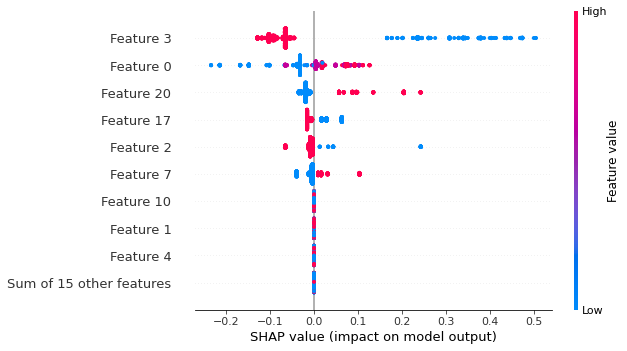

In [13]:
shap.plots.beeswarm(explanation)

[21:39:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


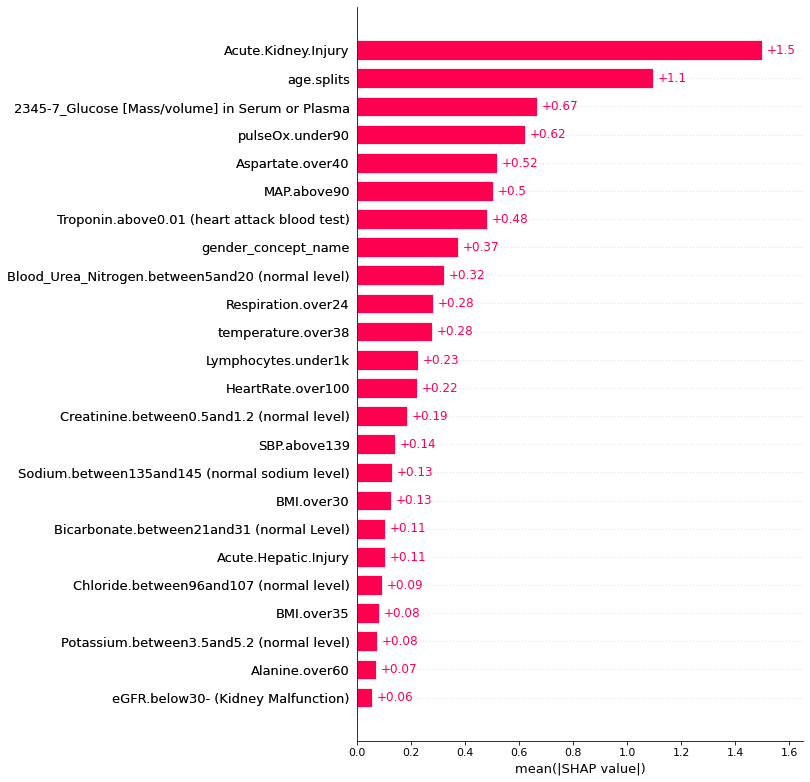

In [78]:
import xgboost

import shap

# train XGBoost model
X = dataframe
y = Y.values
model = xgboost.XGBClassifier().fit(X.values, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.plots.bar(shap_values, max_display=24)

In [8]:
# import numpy as np
# import scipy as sp

# shap.plots.text(shap_values[3])

In [34]:
colume = ["Acute.Kidney.Injury", "age.splits", "2345-7_Glucose [Mass/volume] in Serum or Plasma","pulseOx.under90","Aspartate.over40","MAP.above90"]

In [103]:
dataframe


array([[ 38,   0,   1, ...,   0,   1, 130],
       [ 38,   0,   1, ...,   0,   1, 308],
       [ 38,   0,   1, ...,   0,   0, 139],
       ...,
       [ 38,   1,   1, ...,   0,   1,  92],
       [ 38,   1,   1, ...,   0,   0,  99],
       [ 66,   0,   1, ...,   0,   1,  98]], dtype=int64)

In [20]:
shap_values

.values =
array([[-0.64587621,  0.4468314 , -0.02208477, ...,  0.09834699,
        -0.76603902,  1.54628651],
       [-1.81440514,  0.55414326, -0.06704773, ..., -0.01879399,
        -0.330071  , -0.22774576],
       [-0.89205808,  0.37439724, -0.0241037 , ...,  0.09051591,
         0.25489409,  0.99942089],
       ...,
       [-0.87112438, -0.4222415 , -0.0378909 , ...,  0.10012131,
        -0.65388482, -1.42652029],
       [-0.89779999, -1.14018623, -0.02610916, ...,  0.06846028,
         0.52402937, -0.53809914],
       [ 0.56891387,  0.2904383 , -0.02752187, ...,  0.10119073,
        -0.72486528, -1.17108621]])

.base_values =
array([-4.93826514, -4.93826514, -4.93826514, ..., -4.93826514,
       -4.93826514, -4.93826514])

.data =
array([[ 38.,   0.,   1., ...,   0.,   1., 130.],
       [ 38.,   0.,   1., ...,   0.,   1., 308.],
       [ 38.,   0.,   1., ...,   0.,   0., 139.],
       ...,
       [ 38.,   1.,   1., ...,   0.,   1.,  92.],
       [ 38.,   1.,   1., ...,   0.,   0.,

In [61]:
# np.cov(X_train.T)


In [62]:
# X_train.mean(axis=0)


In [57]:
# coef.sort()
# coef

In [58]:
# indexes = sorted(range(len(coef)), key =  lambda sub: coef[sub],reverse = True)
# indexes
# colume = []
# for i in range(6):
#     colume.append(dataframe.columns[indexes[i]])
# colume
# coef[indexes]

In [69]:
#five features
colume = [ "Acute.Kidney.Injury", "2345-7_Glucose [Mass/volume] in Serum or Plasma","age.splits", "Troponin.above0.01 (heart attack blood test)", "pulseOx.under90"]

In [57]:
#six features
colume = [ "Acute.Kidney.Injury", "2345-7_Glucose [Mass/volume] in Serum or Plasma","age.splits", "Troponin.above0.01 (heart attack blood test)", "pulseOx.under90", "Acute.Hepatic.Injury" ]

In [73]:
#seven features
colume = [ "Acute.Kidney.Injury", "2345-7_Glucose [Mass/volume] in Serum or Plasma","age.splits", "Troponin.above0.01 (heart attack blood test)", "pulseOx.under90", "Acute.Hepatic.Injury","Blood_Urea_Nitrogen.between5and20 (normal level)"  ]


In [94]:
colume = [ "Acute.Kidney.Injury", "2345-7_Glucose [Mass/volume] in Serum or Plasma","age.splits", "Troponin.above0.01 (heart attack blood test)", "pulseOx.under90" ]

In [98]:
colume = [ "Acute.Kidney.Injury", "2345-7_Glucose [Mass/volume] in Serum or Plasma","age.splits", "Troponin.above0.01 (heart attack blood test)", "Acute.Hepatic.Injury" ]

In [102]:
colume = [ "Acute.Kidney.Injury", "2345-7_Glucose [Mass/volume] in Serum or Plasma","age.splits", "pulseOx.under90", "Acute.Hepatic.Injury" ]

In [106]:
colume = [ "Acute.Kidney.Injury", "2345-7_Glucose [Mass/volume] in Serum or Plasma", "Troponin.above0.01 (heart attack blood test)", "pulseOx.under90", "Acute.Hepatic.Injury" ]

In [113]:
colume = [ "Acute.Kidney.Injury","age.splits", "Troponin.above0.01 (heart attack blood test)", "pulseOx.under90", "Acute.Hepatic.Injury" ]

In [117]:
colume = ["2345-7_Glucose [Mass/volume] in Serum or Plasma","age.splits", "Troponin.above0.01 (heart attack blood test)", "pulseOx.under90", "Acute.Hepatic.Injury" ]

In [118]:
bf = dataframe[colume]


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# creating a RF classifier
from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
# clf = RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=24, random_state=0) 
# clf = svm.SVC()
clf = LogisticRegression(C=0.2682695795279725)
# clf = DecisionTreeClassifier(max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(bf, Y, test_size = 0.2, random_state = 41) 
# # Training the model on the training dataset
# # fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
# clf.fit(bf, Y) 
score = clf.predict(X_test)
acc = clf.score(X_test, y_test)
acc

0.8638297872340426

In [120]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
randomforest = clf.predict(X_test)

print("accuracy", accuracy_score(y_test.values, randomforest))
print("ROC-AUC", roc_auc_score(y_test.values, randomforest))
print("MCC", matthews_corrcoef(y_test.values, randomforest))

accuracy 0.8638297872340426
ROC-AUC 0.5785328532853286
MCC 0.2583412016166028


In [62]:
# import numpy as np
# from sklearn import linear_model, decomposition, datasets
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# std_slc = StandardScaler()
# pca = decomposition.PCA()
# logistic_Reg = linear_model.LogisticRegression()
# pipe = Pipeline(steps=[('std_slc', std_slc),
#                            ('pca', pca),
#                            ('logistic_Reg', logistic_Reg)])# pipe = Pipeline([('classifier', RandomForestClassifier())])

# C = np.logspace(-4, 4, 50)
# n_components = list(range(1,X_train.shape[1]+1,1))
# penalty = ['l1', 'l2']
# parameters = dict(pca__n_components=n_components,
#                       logistic_Reg__C=C,
#                       logistic_Reg__penalty=penalty)
# clf_GS = GridSearchCV(pipe, parameters)
# clf_GS.fit(X_train, y_train)
# print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
# print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
# print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
# print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import pandas as pd


param_grid = {'max_depth': [3, 5, 10],
               'min_samples_split': [2, 5, 10]}
base_estimator = RandomForestClassifier(random_state=0)
X_train, y_train = make_classification(n_samples=1000, random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                          factor=2, resource='n_estimators',
                          max_resources=30).fit(X_test, y_test)
sh.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=24,
                       random_state=0)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import HalvingGridSearchCV

# Define parameter grid
params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

# Create halving grid search cv
halving_cv = HalvingGridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=params,
    scoring='accuracy',
    cv=5
) 

# Fit to data
halving_cv.fit(X_train, y_train)

# Best KNN parameters
print('Best Params:', halving_cv.best_params_)  

# Best KNN model
best_knn = halving_cv.best_estimator_

# Evaluate model on test set
print('Accuracy:', best_knn.score(X_test, y_test))
best_knn

Best Params: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.8595744680851064


KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [44]:
# clf.predict(X_test)

In [45]:
# y_test.values

In [46]:
# gammas = [0.1, 1, 10, 100]
# for gamma in gammas:
#     svc = svm.SVC(kernel='rbf', gamma=gamma)
#     svc.fit(X_train, y_train)
#     print(f"{gamma}: {svc.score(X_test, y_test)}")
# kernels = ['linear', 'rbf', 'poly']
# for kernel in kernels:     
#     svc = svm.SVC(kernel=kernel)
#     svc.fit(X_train, y_train)
#     print(f"{kernel}: {svc.score(X_test, y_test)}")   
# cs = [0.1, 1, 10, 100, 1000]
# for c in cs:
#     svc = svm.SVC(kernel='rbf', C=c)
#     svc.fit(X_train, y_train)
#     print(f"{c}: {svc.score(X_test, y_test)}")
# degrees = [0, 1, 2, 3, 4, 5, 6]
# for degree in degrees:
#     svc = svm.SVC(kernel='poly', degree=degree)
#     svc.fit(X_train, y_train)
#     print(f"{degree}: {svc.score(X_test, y_test)}")

In [47]:
# joblib.dump(clf,"final.sav")

In [48]:
# dataframe.iloc[:,0:1]

In [49]:
# balanced_accuracy_score(dataframe.iloc[:,0], randomforest)

In [50]:
# dataframe =  pandas.read_csv("file:\\Users\mayma\Downloads\cleaned_data (1).csv")
# dataframe = dataframe.iloc[:,1:]
# dataframe = dataframe.drop(["length_of_stay"], axis = 1)
# dataframe = dataframe.drop(["is_icu"], axis = 1)
# dataframe = dataframe.drop(["was_ventilated"], axis = 1)
kfold = KFold(n_splits = 10, shuffle = True)
kfold.get_n_splits(dataframe)



10

In [51]:
accuracy_average = 0
precision_average = 0
recall_average = 0
f1_average = 0
for train_index, test_index in kfold.split(bf):
  test = bf.iloc[test_index]
  train = bf.iloc[train_index]
  # randomforestprediction = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
  # randomforestprediction.fit(train.iloc[:,1:],  train.iloc[:,0])
  randomforest = clf.predict(X_test)
  accuracy_average += (accuracy_score(y_test, randomforest))
  precision_average += (precision_score(y_test, randomforest))
  recall_average += (recall_score(y_test, randomforest))
  f1_average += (f1_score(y_test, randomforest))
print("accuracy", accuracy_average/10)
print("precision", precision_average/10)
print("recall", recall_average/10)
print("f1", f1_average/10)

accuracy 0.8808510638297873
precision 0.5714285714285713
recall 0.6060606060606062
f1 0.5882352941176469


In [24]:
# accuracy_average = 0
# precision_average = 0
# recall_average = 0
# f1_average = 0
# for train_index, test_index in kfold.split(dataframe):
#   test = dataframe.iloc[test_index]
#   train = dataframe.iloc[train_index]
#   predict_model = svm.SVC()
#   predict_model.fit(train.iloc[:,1:],  train.iloc[:,0])
#   svm = predict_model.predict(test.iloc[:,1:])
#   accuracy_average += (accuracy_score(test.iloc[:,0], svm))
#   precision_average += (precision_score(test.iloc[:,0], svm))
#   recall_average += (recall_score(test.iloc[:,0], svm))
#   f1_average += (f1_score(test.iloc[:,0], svm))
# print("accuracy", accuracy_average/10)
# print("precision", precision_average/10)
# print("recall", recall_average/10)
# print("f1", f1_average/10)

In [6]:
# accuracy_average = 0
# precision_average = 0
# recall_average = 0
# f1_average = 0
# for train_index, test_index in kfold.split(dataframe):
#   test = dataframe.iloc[test_index]
#   train = dataframe.iloc[train_index]
#   kneihbors = KNeighborsClassifier(n_neighbors = 10)
#   kneihbors.fit(train.iloc[:,1:],  train.iloc[:,0])
#   neighbors = kneihbors.predict(test.iloc[:,1:])
#   accuracy_average += (accuracy_score(test.iloc[:,0], neighbors))
#   precision_average += (precision_score(test.iloc[:,0], neighbors))
#   recall_average += (recall_score(test.iloc[:,0], neighbors))
#   f1_average += (f1_score(test.iloc[:,0], neighbors))
# print("accuracy", accuracy_average/10)
# print("precision", precision_average/10)
# print("recall", recall_average/10)
# print("f1", f1_average/10)

In [7]:
dataframe =  pandas.read_excel("file:\\Users\mayma\Downloads\highagedatacovid-19.xlsx")
dataframe = dataframe.iloc[:,1:]
# dataframe=dataframe.iloc[:,:6]

sum(dataframe["gender_concept_name"] == 0)
dataframe

,last.status,age.splits,gender_concept_name,is_icu,was_ventilated,length_of_stay,Acute.Hepatic.Injury,Acute.Kidney.Injury,BMI.over30,BMI.over35,...,Potassium.between3.5and5.2 (normal level),Chloride.between96and107 (normal level),Bicarbonate.between21and31 (normal Level),Blood_Urea_Nitrogen.between5and20 (normal level),Creatinine.between0.5and1.2 (normal level),eGFR.below30- (Kidney Malfunction),Troponin.above0.01 (heart attack blood test),SBP.above139,MAP.above90,2345-7_Glucose [Mass/volume] in Serum or Plasma
0,0,82,1,0,1,4,1,1,1,1,...,1,1,1,0,1,0,0,0,0,86
1,1,82,1,0,1,4,1,1,0,0,...,1,1,1,0,1,0,1,0,1,126
2,0,82,0,0,1,10,1,0,1,0,...,1,1,0,0,0,0,1,0,0,122
3,0,82,1,0,1,3,1,1,0,0,...,1,1,1,1,1,0,0,1,1,156
4,0,82,1,0,1,17,1,1,1,0,...,1,0,0,0,0,0,1,1,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,82,1,0,1,6,1,1,0,0,...,1,0,1,0,1,0,0,0,1,171
260,1,82,1,0,1,11,1,1,0,0,...,1,1,1,0,0,0,0,0,0,112
261,0,82,1,0,1,5,1,1,0,0,...,1,1,1,1,1,0,0,0,0,104
262,0,82,0,0,1,12,1,1,1,0,...,1,1,1,0,0,0,0,0,0,112


In [8]:
Y=dataframe["last.status"]

In [9]:
dataframe = dataframe.iloc[:,1:]
dataframe = dataframe.drop(["length_of_stay"], axis = 1)
dataframe = dataframe.drop(["is_icu"], axis = 1)
dataframe = dataframe.drop(["was_ventilated"], axis = 1)
dataframe

,age.splits,gender_concept_name,Acute.Hepatic.Injury,Acute.Kidney.Injury,BMI.over30,BMI.over35,temperature.over38,pulseOx.under90,Respiration.over24,HeartRate.over100,...,Potassium.between3.5and5.2 (normal level),Chloride.between96and107 (normal level),Bicarbonate.between21and31 (normal Level),Blood_Urea_Nitrogen.between5and20 (normal level),Creatinine.between0.5and1.2 (normal level),eGFR.below30- (Kidney Malfunction),Troponin.above0.01 (heart attack blood test),SBP.above139,MAP.above90,2345-7_Glucose [Mass/volume] in Serum or Plasma
0,82,1,1,1,1,1,0,0,0,0,...,1,1,1,0,1,0,0,0,0,86
1,82,1,1,1,0,0,0,1,1,0,...,1,1,1,0,1,0,1,0,1,126
2,82,0,1,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,122
3,82,1,1,1,0,0,0,0,0,1,...,1,1,1,1,1,0,0,1,1,156
4,82,1,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,82,1,1,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,171
260,82,1,1,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,112
261,82,1,1,1,0,0,0,1,1,0,...,1,1,1,1,1,0,0,0,0,104
262,82,0,1,1,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,112


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# creating a RF classifier
# clf = KNeighborsClassifier(n_neighbors=3)
# clf = svm.SVC()
clf = LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')
# clf = LogisticRegression(C=78.47599703514607, solver='liblinear')
# clf = RandomForestClassifier(max_depth=10, n_estimators=24, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(dataframe, Y, test_size = 0.2, random_state = 41) 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
score = clf.score(X_test,y_test)
ypred = clf.predict(X_test)
# coef =  clf.feature_importances_
score

0.8113207547169812

In [11]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
randomforest = clf.predict(X_test)

print("accuracy", accuracy_score(y_test.values, randomforest))
print("AUC", roc_auc_score(y_test.values, randomforest))
print("MCC", matthews_corrcoef(y_test.values, randomforest))


accuracy 0.8113207547169812
AUC 0.7679738562091503
MCC 0.5553422363071904


In [12]:
#six features
colume = [ "Acute.Kidney.Injury", "2345-7_Glucose [Mass/volume] in Serum or Plasma","age.splits", "Troponin.above0.01 (heart attack blood test)", "pulseOx.under90", "Acute.Hepatic.Injury" ]

In [13]:
bf = dataframe[colume]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# creating a RF classifier
from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
# clf = RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=24, random_state=0) 
# clf = svm.SVC()
clf = LogisticRegression(C=0.2682695795279725)
# clf = DecisionTreeClassifier(max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(bf, Y, test_size = 0.2, random_state = 41) 
# # Training the model on the training dataset
# # fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
# clf.fit(bf, Y) 
score = clf.predict(X_test)
acc = clf.score(X_test, y_test)
acc

0.7735849056603774

In [15]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
randomforest = clf.predict(X_test)

print("accuracy", accuracy_score(y_test.values, randomforest))
print("ROC-AUC", roc_auc_score(y_test.values, randomforest))
print("MCC", matthews_corrcoef(y_test.values, randomforest))

accuracy 0.7735849056603774
ROC-AUC 0.7091503267973855
MCC 0.4537980051322848
